# An√°lise explorat√≥ria dos dados

Esse documento tem como fim analisar os acidentes ocorridos nas rodovias que s√£o administradas pela concession√°ria RioSP.

## Importanto bibliotecas

Bibliotecas usadas na an√°lise

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Lendo arquivo csv com pandas

In [2]:
# Usando o m√©todo read_csv do pandas para ler o arquivo csv. 
# Adicionei par√¢metros para a leitura correta do arquivo

df = pd.read_csv(
    'demostrativo_acidentes_riosp.csv', 
    delimiter=';',              
    encoding='latin-1'          
)

# O arquivo csv est√° separado por ';', o padr√£o do read_csv √© ',',
# Por isso √© necess√°rio informar o separador usado
# 'utf-8' √© o padr√£o do encoding do read_csv, 
# mas esse arquivo possui caracteres especiais que n√£o est√£o no 'utf-8', 
# por isso √© recomend√°vel usar o 'latin-1'

#### üß© Encodings mais comuns no Python e no Jupyter

##### O que √© ‚Äúencoding‚Äù
**Encoding (codifica√ß√£o)** √© o processo de converter caracteres em bytes dentro de um arquivo.  
Quando o Python l√™ o arquivo, ele precisa saber **qual codifica√ß√£o foi usada** para interpretar o texto corretamente.

---

##### üåç Encodings mais comuns

| Encoding | Tamb√©m chamado de | Descri√ß√£o | Onde √© mais usado |
|-----------|------------------|------------|--------------------|
| **UTF-8** | ‚Äî | Padr√£o moderno da web e do Python. Suporta todos os caracteres Unicode. | Web, APIs, Linux, arquivos recentes. |
| **Latin-1** | ISO-8859-1 | Codifica√ß√£o de idiomas ocidentais, incluindo acentos e cedilha. | Europa Ocidental, Brasil (sistemas antigos). |
| **CP1252** | Windows-1252 | Varia√ß√£o do Latin-1 usada pelo Windows. Inclui s√≠mbolos extras (‚Ç¨). | Windows, Excel, Word. |
| **UTF-16** | ‚Äî | Codifica√ß√£o Unicode em 2 bytes. Pode ter ‚ÄúBOM‚Äù (Byte Order Mark). | Arquivos exportados de Excel/Windows. |
| **UTF-8-SIG** | ‚Äî | UTF-8 com BOM no in√≠cio do arquivo. Evita erros em alguns programas Microsoft. | Windows, Excel. |
| **ASCII** | ‚Äî | Codifica apenas caracteres b√°sicos (A‚ÄìZ, 0‚Äì9, pontua√ß√£o simples). | Arquivos antigos, sistemas legados. |
| **CP850 / CP437** | ‚Äî | Codifica√ß√µes antigas do DOS. | Sistemas legados (ERP, impressoras antigas). |
| **Shift-JIS / EUC-JP** | ‚Äî | Codifica√ß√µes para caracteres japoneses. | Jap√£o. |
| **GBK / GB2312** | ‚Äî | Codifica√ß√µes para caracteres chineses. | China. |
| **KOI8-R** | ‚Äî | Codifica√ß√£o para o alfabeto cir√≠lico (russo). | R√∫ssia. |

---

##### üí° Dicas pr√°ticas

1. üîπ **UTF-8** ‚Üí sempre que poss√≠vel, **use ou converta para UTF-8**.  
   √â o padr√£o mais universal e evita erros de leitura no Python.

2. üîπ **Latin-1 (ISO-8859-1)** ‚Üí muito comum em **arquivos brasileiros** ou exportados do Excel.  
   Se tiver acentos e der erro de `utf-8`, tente este.

3. üîπ **CP1252** ‚Üí muito parecido com o Latin-1, mas com alguns s√≠mbolos a mais.  
   Tamb√©m t√≠pico d


Fonte: ChatGPT


In [3]:
# Visualizando os dados
# Para melhor visualiza√ß√£o, irei ordenar o arquivo por data e hora
# Para realizar a ordena√ß√£o, preciso transformar as vari√°veis de hora e data em datetime

df['datahora'] = pd.to_datetime(
    df['data'] + ' ' + df['horario'],   # Unindo os dois dados
    format='%d/%m/%Y %H:%M:%S'          # Formatando no padr√£o de data e hora brasileiro
)

df = df.sort_values('datahora').reset_index(drop=True)        # Ordenando o dataframe pela nova coluna de data e hora, e reseto o index
df

data   horario  n_da_ocorrencia tipo_de_ocorrencia       km  \
0      01/03/2022  01:30:00              295         Acidente s    182,3   
1      01/03/2022  03:19:00               56         Acidente s      6,5   
2      01/03/2022  05:58:00              456         Acidente c    178,6   
3      01/03/2022  06:22:00               88         Acidente c    181,2   
4      01/03/2022  06:57:00              480         Acidente c   205,49   
...           ...       ...              ...                ...      ...   
29686  30/09/2025  09:33:00              629         Com v√≠tima  401,000   
29687  30/09/2025  10:11:00              639         Com v√≠tima   50,000   
29688  30/09/2025  10:49:00              279         Com v√≠tima  248,000   
29689  30/09/2025  11:31:00              661         Sem v√≠tima  382,500   
29690  30/09/2025  12:51:00              349         Com v√≠tima  391,000   

          trecho      sentido                      tipo_de_acidente  \
0      BR-116/SP        Norte                      Colis√£o traseira   
1      BR-116/SP        Norte                 Choque em objeto fixo   
2      BR-116/RJ        Norte                      Colis√£o traseira   
3      BR-116/RJ        Norte                        Queda de Carga   
4      BR-116/RJ          Sul                         Choque Talude   
...          ...          ...                                   ...   
29686  BR-101/RJ    Crescente                         Engavetamento   
29687  BR-101/SP  Decrescente  Colis√£o lateral em sentido contr√°rio   
29688  BR-116/RJ    Crescente                           Capotamento   
29689  BR-101/RJ  Decrescente             Atropelamento de pedestre   
29690  BR-101/RJ  Decrescente           Acidentes de outra natureza   

       automovel  bicicleta  ...  tracao_animal  \
0              0          0  ...              0   
1              0          0  ...              0   
2              0          0  ...              0   
3              0          0  ...              0   
4              1          0  ...              0   
...          ...        ...  ...            ...   
29686          3          0  ...              0   
29687          1          0  ...              0   
29688          0          0  ...              0   
29689          0          0  ...              0   
29690          0          0  ...              0   

       transporte_de_cargas_especiais  trator_maquinas  utilitarios  ilesos  \
0                                   0                0            0       2   
1                                   0                0            0       1   
2                                   0                0            0       0   
3                                   0                0            0       0   
4                                   0                0            0       0   
...                               ...              ...          ...     ...   
29686                               0                0            0       2   
29687                               0                0            0       2   
29688                               0                0            0       0   
29689                               0                0            1       2   
29690                               0                0            0       0   

       levemente_feridos  moderadamente_feridos  gravemente_feridos  mortos  \
0                      0                      0                   0       0   
1                      0                      0                   0       0   
2                      4                      0                   0       0   
3                      1                      0                   0       0   
4                      3                      0                   0       0   
...                  ...                    ...                 ...     ...   
29686                  1                      0                   0       0   
29687                  1                    

In [4]:
# Usando o min e o max, podemos ver o in√≠cio e fim do nosso hist√≥rio
# E com o count √© poss√≠vel ver a quantidade de registros

print(
    'Inicio do hist√≥rico: \n',
    df['datahora'].min(), '\n\n',
    'Fim do hist√≥rico: \n',
    df['datahora'].max(), '\n\n',
    'Quantidade de registros: \n',
    df['datahora'].count()
)


Inicio do hist√≥rico: 
 2022-03-01 01:30:00 

 Fim do hist√≥rico: 
 2025-09-30 12:51:00 

 Quantidade de registros: 
 29691


In [5]:
# Podemos usar o describe que tamb√©m obteriamos esses resultados. Ele retorna algumas dados estat√≠sticos do df

df['datahora'].describe()

count                            29691
mean     2023-12-11 20:07:11.169041152
min                2022-03-01 01:30:00
25%                2023-01-17 10:32:30
50%                2023-12-14 06:23:00
75%                2024-10-21 09:45:30
max                2025-09-30 12:51:00
Name: datahora, dtype: object

Com esses poucos m√©todos, podemos obter a informa√ß√£o que nossos dados come√ß√£o no dia 01 de mar√ßo de 2022, e v√£o at√© 30 de setembro de 2025, e contam com 29.691 registros de acidentes

## Explorando nossos dados com gr√°ficos

Agora para explorarmos nossos dados e obtermos informa√ß√µes mais objetivas, vou usar os gr√°ficos do seaborn para ajudar na an√°lise.

Vamos come√ßar entendendo a quantidade de acidentes por trimestre

### Criando um gr√°fico de linha

In [6]:
# √â criado uma nova coluna pegando por meio do atributo dt da colunda datahora o ano e o trimestre
# Transformo em string com o m√©todo .astype para poder concatenar essas infos em uma coluna √∫nica
df['trimestre'] = df['datahora'].dt.year.astype('str') + '.' + df['datahora'].dt.quarter.astype(str)

In [7]:
# Agrupo os registros pela coluna trimestre criada
# Passo o False para o par√¢metro 'as_index' para que a coluna trimestre n√£o vire um index

df_trimestre = df.groupby(
    'trimestre',
    as_index=False
).size()

# O m√©todo .size no final serve justamente para fazer a contagem das ocorr√™ncias, sem precisar contar alguma colunas espec√≠fica

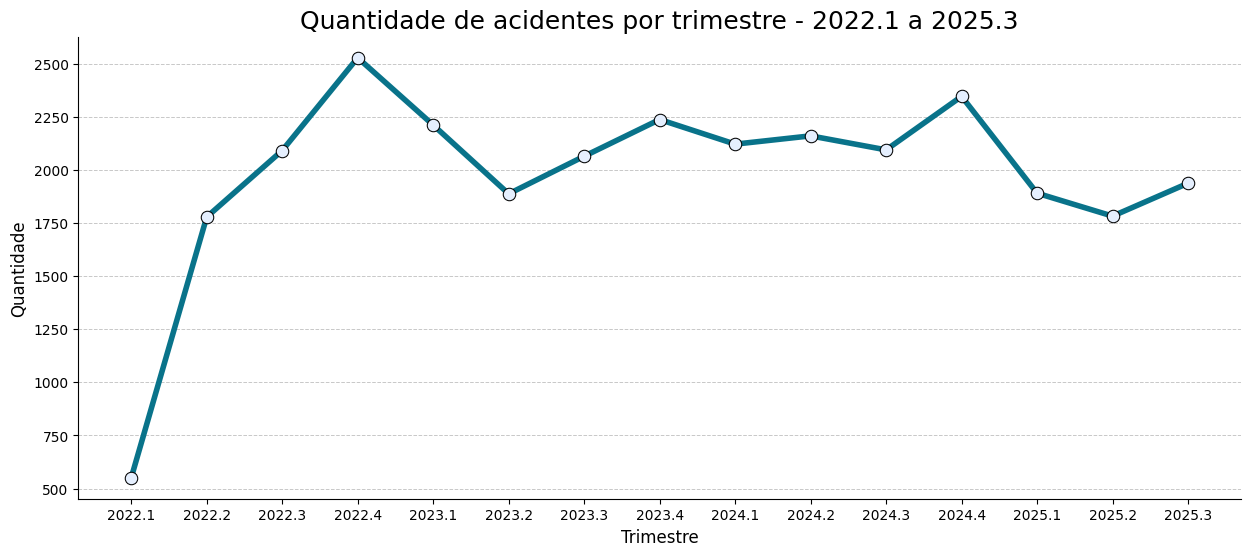

In [8]:
# Criando o gr√°fico de linha

# Criando o gr√°fico de linha com a fun√ß√£o lineplot 
ax = sns.lineplot(
    data = df_trimestre,
    x = 'trimestre',
    y = 'size',
    color = '#09738a',       # Altera a cor da linha, pode ser usado com hex
    linewidth = 4,          # Altera a grossura da linha
    marker = 'o',           # Adiciona marcadores a linha
    markersize = 9          # Altera o tamanho dos marcadores
)

# Aqui v√£o algumas customiza√ß√µes

# Alterando o tamanho do gr√°fico
ax.figure.set_size_inches(15,6)

# Adicionando t√≠tulo
ax.set_title(
    'Quantidade de acidentes por trimestre - 2022.1 a 2025.3',
    loc = 'center',
    fontsize = 18
)

# Adicionando as labels dos eixos x e y
ax.set_xlabel(
    'Trimestre',
    fontsize = 12
)
ax.set_ylabel(
    'Quantidade',
    fontsize = 12
)

# Adiciona linhas horizontais para ajudar na visualiza√ß√£o dos dados
ax.grid(
    axis='y',           # Em qual eixo ser√° criado as linhas
    linestyle='--',     # Estilo das linhas
    linewidth=0.7,      # Grossura das linhas
    alpha=0.7           # Transpar√™ncia
)

# Altera as cores dos marcadores
for line in ax.lines:
    line.set_markerfacecolor('#e5effe')  # cor interna
    line.set_markeredgecolor('black')   # borda 

# Retira as linhas que fecham a 'caixa' do gr√°fico, mantendo apenas os eixos
sns.despine()

# Exibindo o gr√°fico
plt.show()

Por meio do Seaborn, e com os modificadores do Matplotlib, foi criado um gr√°fico para visualiza√ß√£o da quantidade de acidentes ocorridos por trimestre desde mar√ßo de 2022 at√© setembro de 2025.

Por meio do gr√°fico podemos observar que existe um vale justamente no come√ßo do gr√°fico, no 1¬∫ trimestre de 2022. Isso ocorre porque o 1¬∫ trimestre de 2022 s√≥ possui dados de  mar√ßo, que √© onde come√ßa nossos dados. Para que isso n√£o afete nossa vis√£o, j√° que esse trimestre possui menos tempo de apura√ß√£o de dados que os restantes, √© necess√°rio exclui-lo do nosso df_trimestre.

In [9]:
# Filtrando o df_trimestre, retirando o trimestre 2022.1

df_trimestre = df_trimestre[df_trimestre['trimestre'] != '2022.1']

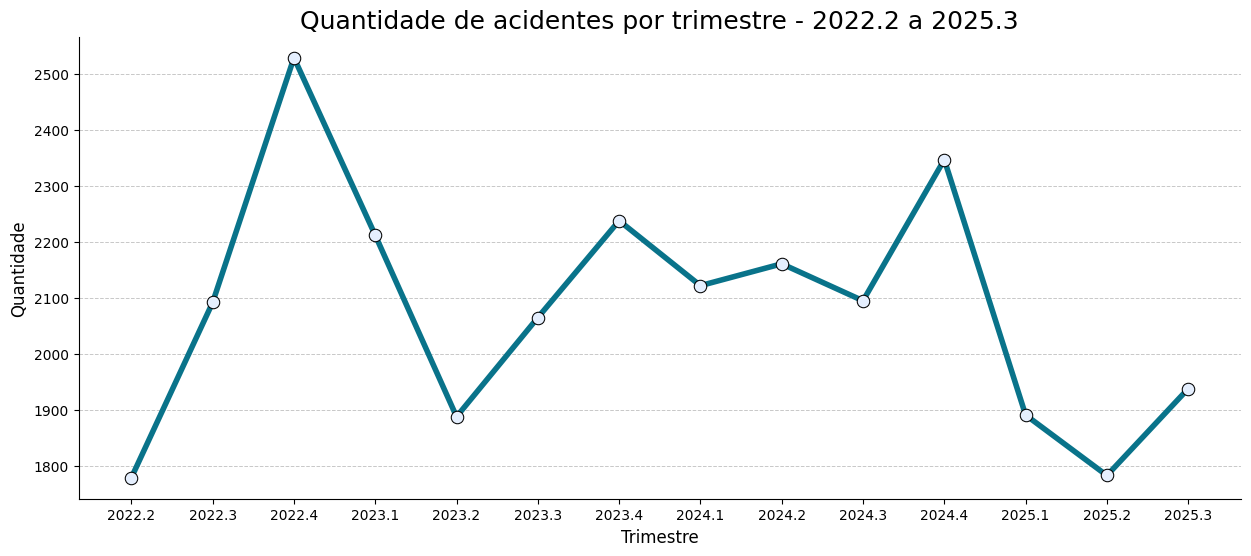

In [10]:
# Refazendo o gr√°fico

# Criando o gr√°fico de linha com a fun√ß√£o lineplot 
ax = sns.lineplot(
    data = df_trimestre,
    x = 'trimestre',
    y = 'size',
    color = '#09738a',       # Altera a cor da linha, pode ser usado cores pelo hex
    linewidth = 4,          # Altera a grossura da linha
    marker = 'o',           # Adiciona marcadores a linha
    markersize = 9          # Altera o tamanho dos marcadores
)

# Aqui v√£o algumas customiza√ß√µes

# Alterando o tamanho do gr√°fico
ax.figure.set_size_inches(15,6)

# Adicionando t√≠tulo
ax.set_title(
    'Quantidade de acidentes por trimestre - 2022.2 a 2025.3',
    loc = 'center',
    fontsize = 18
)

# Adicionando as labels dos eixos x e y
ax.set_xlabel(
    'Trimestre',
    fontsize = 12
)
ax.set_ylabel(
    'Quantidade',
    fontsize = 12
)

# Adiciona linhas horizontais para ajudar na visualiza√ß√£o dos dados
ax.grid(
    axis='y',           # Em qual eixo ser√° criado as linhas
    linestyle='--',     # Estilo das linhas
    linewidth=0.7,      # Grossura das linhas
    alpha=0.7           # Transpar√™ncia
)

# Altera as cores dos marcadores
for line in ax.lines:
    line.set_markerfacecolor('#e5effe')  # todos os marcadores laranja
    line.set_markeredgecolor('black')   # borda preta

# Retira as linhas que fecham a 'caixa' do gr√°fico, mantendo apenas os eixos
sns.despine()

# Exibindo o gr√°fico
plt.show()

Com o outlier removido, √© poss√≠vel ter uma vis√£o mais limpa da varia√ß√£o de acidentes durante o per√≠odo.

#### üéØ Formatos Comuns de Marcadores (Markers) no Matplotlib/Seaborn

Os marcadores (`marker`) s√£o usados para destacar pontos em gr√°ficos de linha (`lineplot`) ou scatter plots.  

##### Formatos mais comuns

| S√≠mbolo | Forma |
|---------|------|
| `'o'`   | C√≠rculo |
| `'s'`   | Quadrado |
| `'^'`   | Tri√¢ngulo para cima |
| `'v'`   | Tri√¢ngulo para baixo |
| `'D'`   | Losango |
| `'*'`   | Estrela |
| `'X'`   | X mai√∫sculo |
| `'P'`   | Pent√°gono |
| `'H'`   | Hex√°gono |

#### üé® Tipos de Linhas (Line Styles) no Matplotlib/Seaborn

O par√¢metro `linestyle` ou `ls` define o estilo da linha em gr√°ficos de linha (`lineplot`) ou gr√°ficos de linha do Matplotlib.

##### Tipos comuns de linhas

| C√≥digo | Estilo |
|--------|--------|
| `'-'`  | Linha cont√≠nua (solid) |
| `'--'` | Linha tracejada (dashed) |
| `'-.'` | Linha tra√ßo-ponto (dash-dot) |
| `':'`  | Linha pontilhada (dotted) |
| `'None'` ou `''` | Sem linha (apenas marcadores) |


Fonte: ChatGPT

### Criando um gr√°fico de colunas

Agora vamos verificar a quantidade de acidentes nos trechos das rodovias.

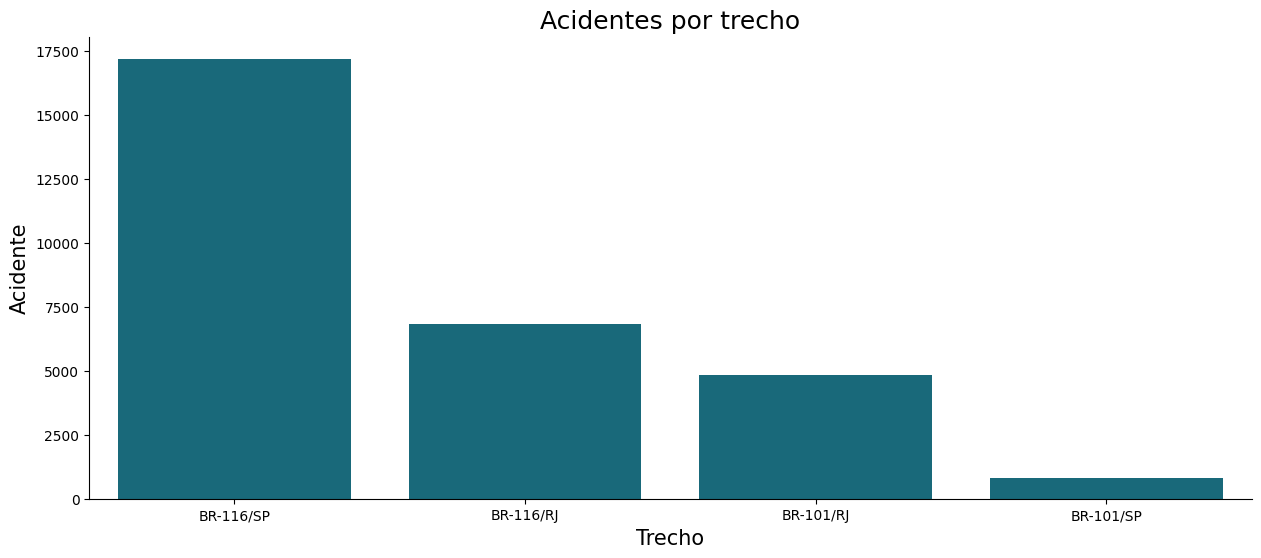

In [11]:
# Criando o gr√°fico de colunas

# Com a fun√ß√£o 'countplot' podemos criar um gr√°fico com a 
# contagem de ocorr√™ncias da coluna informada no par√¢metro x
ax_trecho = sns.countplot(
    data = df,
    x = 'trecho',
    color = '#09738a'
)

# Alterando o tamanho do gr√°fico
ax_trecho.figure.set_size_inches(15,6)

# Adicionando t√≠tulo
ax_trecho.set_title(
    'Acidentes por trecho',
    loc = 'center',
    fontsize = 18
)

# Adicionando as labels dos eixos x e y
ax_trecho.set_xlabel(
    'Trecho',
    fontsize = 15
)
ax_trecho.set_ylabel(
    'Acidente',
    fontsize = 15
)

# Retira as linhas que fecham a 'caixa' do gr√°fico, mantendo apenas os eixos
sns.despine()

# Exibindo o gr√°fico
plt.show()

Com o gr√°fico de colunas contando a quantidade de acidentes por trecho podemos ter uma vis√£o da distribui√ß√£o de acidentes. Podemos verificar que a maior quantidade de acidentes ocorre no trecho 'BR-116/SP', com a vis√£o gr√°fica √© at√© poss√≠vel perceber que o valor da 'BR-116/SP' √© praticamente o dobro do 2¬∫ colocado 'BR-116/RJ'.

### Gr√°fico de colunas agrupadas

Com o n√∫mero de acidentes por trecho podemos ver qual o trecho com mais acidente, mas e se quisermos ver esse mesmo gr√°fico, mas por ano?

Podemos criar um gr√°fico de colunas agrupadas adicionando um √∫nico par√¢metro na cria√ß√£o do gr√°fico: o parametro **'hue'**.

In [12]:
# Criando uma coluna de ano no df

df['ano'] = df['datahora'].dt.year

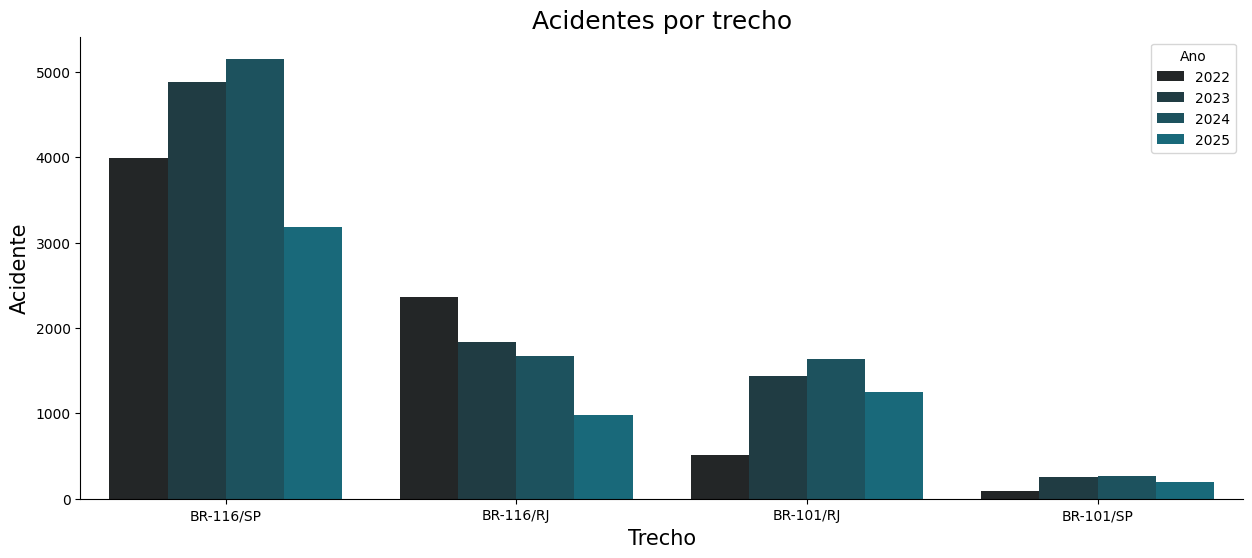

In [13]:
# Criando o gr√°fico de colunas

# Com a fun√ß√£o 'countplot' podemos criar um gr√°fico com a 
# contagem de ocorr√™ncias da coluna informada no par√¢metro x
ax_trecho = sns.countplot(
    data = df,
    x = 'trecho',
    # color = '#09738a',    # Com o hue ativo, n√£o informe cor
    palette='dark:#09738a', # Informe uma paleta de cores
    hue = 'ano'
)

# Alterando o tamanho do gr√°fico
ax_trecho.figure.set_size_inches(15,6)

# Adicionando t√≠tulo
ax_trecho.set_title(
    'Acidentes por trecho',
    loc = 'center',
    fontsize = 18
)

# Adicionando as labels dos eixos x e y
ax_trecho.set_xlabel(
    'Trecho',
    fontsize = 15
)
ax_trecho.set_ylabel(
    'Acidente',
    fontsize = 15
)

# Alterando o nome do t√≠tulo
ax_trecho.legend(title='Ano')

# Retira as linhas que fecham a 'caixa' do gr√°fico, mantendo apenas os eixos
sns.despine()

# Exibindo o gr√°fico
plt.show()

Como sabemos, nosso dataframe n√£o possui os anos de 2022 e 2025 completos, mas mesmo assim podemos tirar alguma informa√ß√£o de desse nosso gr√°fico.

Uma curiosidade √© que os acidentes no trecho 'BR-116/RJ' vem caindo ano ap√≥s ano. Mesmo em 2022, que n√£o est√° completo, houveram mais acidentes que nos outros anos completos.

O trecho com mais acidentes √© o trecho 'BR-116/SP', e o ano com mais acidentes foi 2024.

### Criando um gr√°fico de barras horizontais

Dentro do nosso df, existe uma coluna que classifica os tipos de acidentes, vamos analisar qual tipo de acidente √© mais frequente.

In [14]:
# Criando um df que ir√° agrupar os dados por tipo de acidente

df_tipoAcidente = df.groupby(
    'tipo_de_acidente',
    as_index=False
).size().sort_values('size', ascending=False)

# Uso o size para criar uma coluna de contagem
# Uso o sort_values com ascending igual a False
# para ordenar do maior para o menor

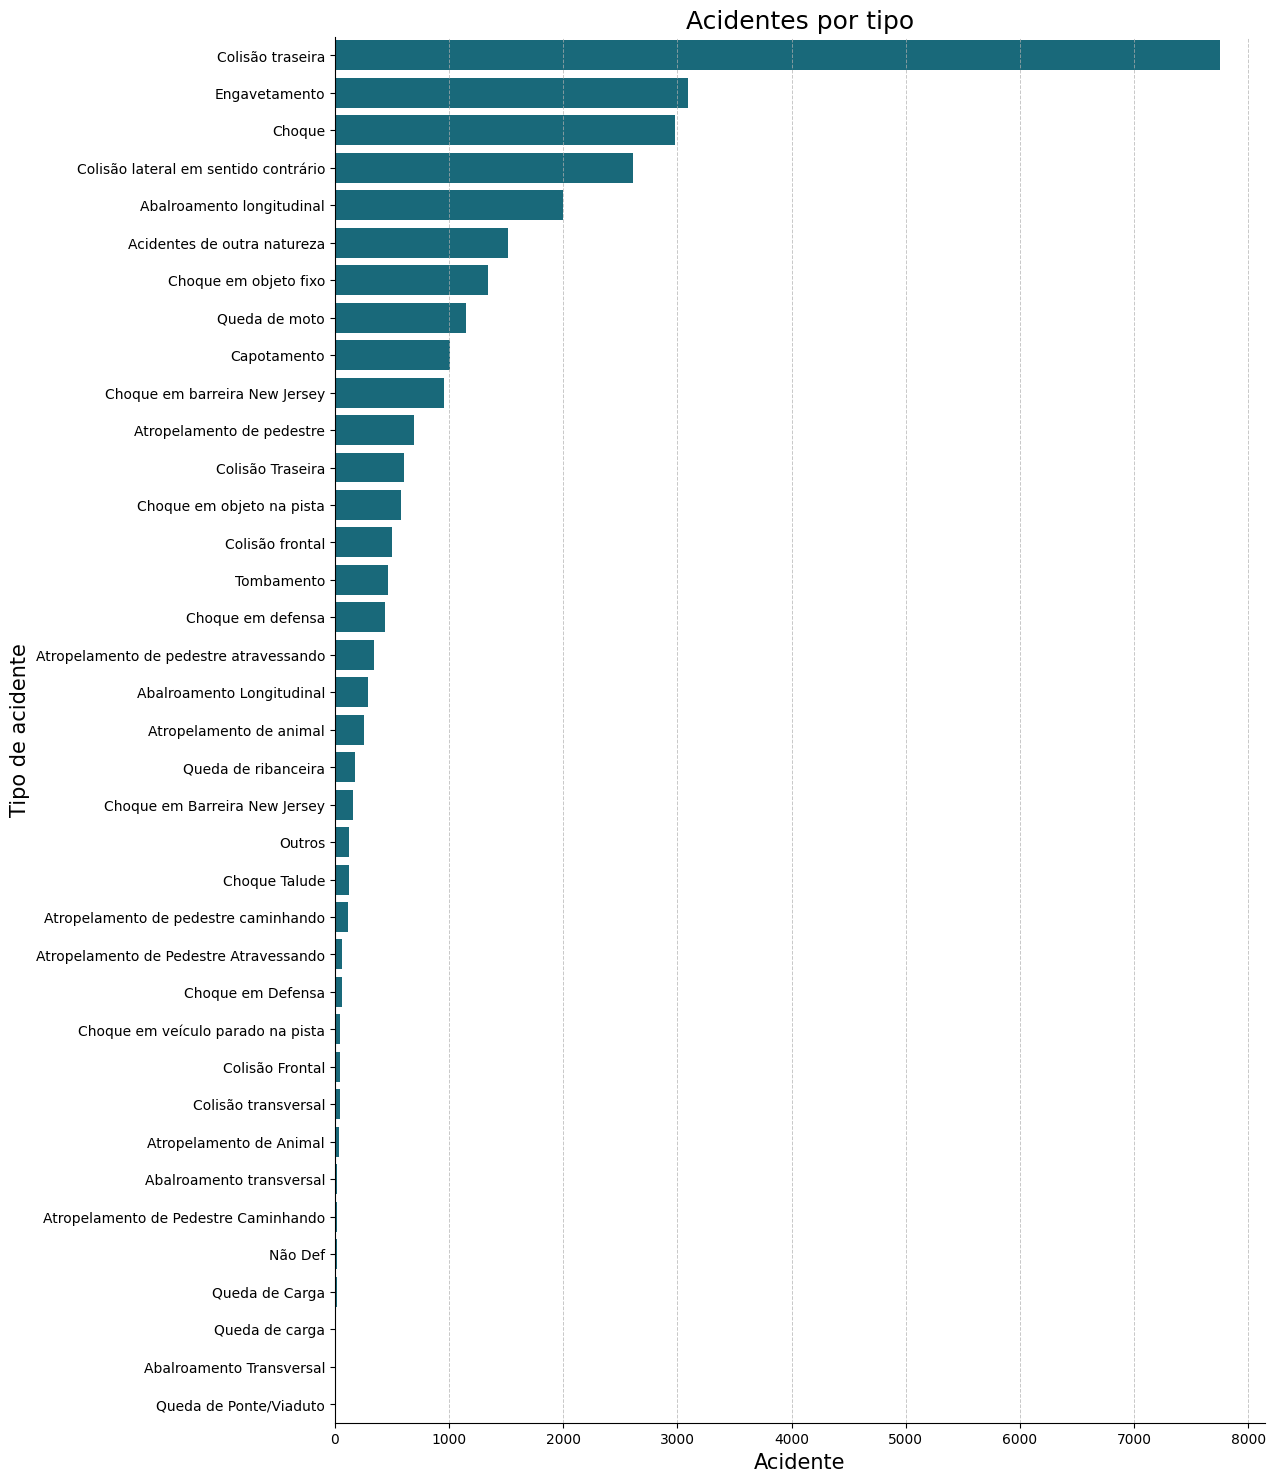

In [15]:
# Criando gr√°fico de barras horizontais

# Criando o gr√°fico com barplot
ax_tipoAcidente = sns.barplot(
    data = df_tipoAcidente,
    x = 'size',
    y = 'tipo_de_acidente',
    color = '#09738a'
    # order = 'size'
    
    # Se o df n√£o estiver ordenado, 
    # podemos ordenar ao fazer o gr√°fico
    # usando o par√¢metro 'order'
)

# Alterando o tamanho do gr√°fico
ax_tipoAcidente.figure.set_size_inches(12,18)

# Alterando o t√≠tulo
ax_tipoAcidente.set_title(
    'Acidentes por tipo',
    loc = 'center',
    fontsize = 18
)

# Adicionando as labels dos eixos x e y
ax_tipoAcidente.set_xlabel(
    'Acidente',
    fontsize = 15
)
ax_tipoAcidente.set_ylabel(
    'Tipo de acidente',
    fontsize = 15
)

# Adiciona linhas horizontais para ajudar na visualiza√ß√£o dos dados
ax_tipoAcidente.grid(
    axis='x',           # Em qual eixo ser√° criado as linhas
    linestyle='--',     # Estilo das linhas
    linewidth=0.7,      # Grossura das linhas
    alpha=0.7           # Transpar√™ncia
)

# Retira as linhas que fecham a 'caixa' do gr√°fico, mantendo apenas os eixos
sns.despine()

# Exibindo o gr√°fico
plt.show()

O gr√°fico de barras horizontais √© perfeito para lidarmos com varias categorias e que possuem uma descri√ß√£o um pouco extensa. Na nossa an√°lise, conseguimos verificar que tipo de acidente mais comum √© a **colis√£o traseira**, com mais que o dobro do 2¬∫ colocado, que √© **engavetamento**.

### Gr√°ficos de distribui√ß√£o

### Histograma

Podemos usar um histograma para entender como nossos dados se distribuem em uma determinada vari√°vel.

Vamos fazer isso, olhando os acidentes por trecho e altura do acidente (km).

In [16]:
# Primeiro vamos transformar a vari√°vel km em float

# Usando o .replace eu troco a v√≠rgula por ponto
# Em seguida com .astype eu transformo em float
df['km_ajustado'] = df['km'].str.replace(',','.').astype('float')

In [17]:
# Buscando as rodovias pelo nomes dos trechos

# Uso o .split para dividir a string do trecho em duas,
# E uso o par√¢metro expand para separar a lista criada em duas colunas
df[['rodovia', 'estado']] = df['trecho'].str.split('/', expand=True)

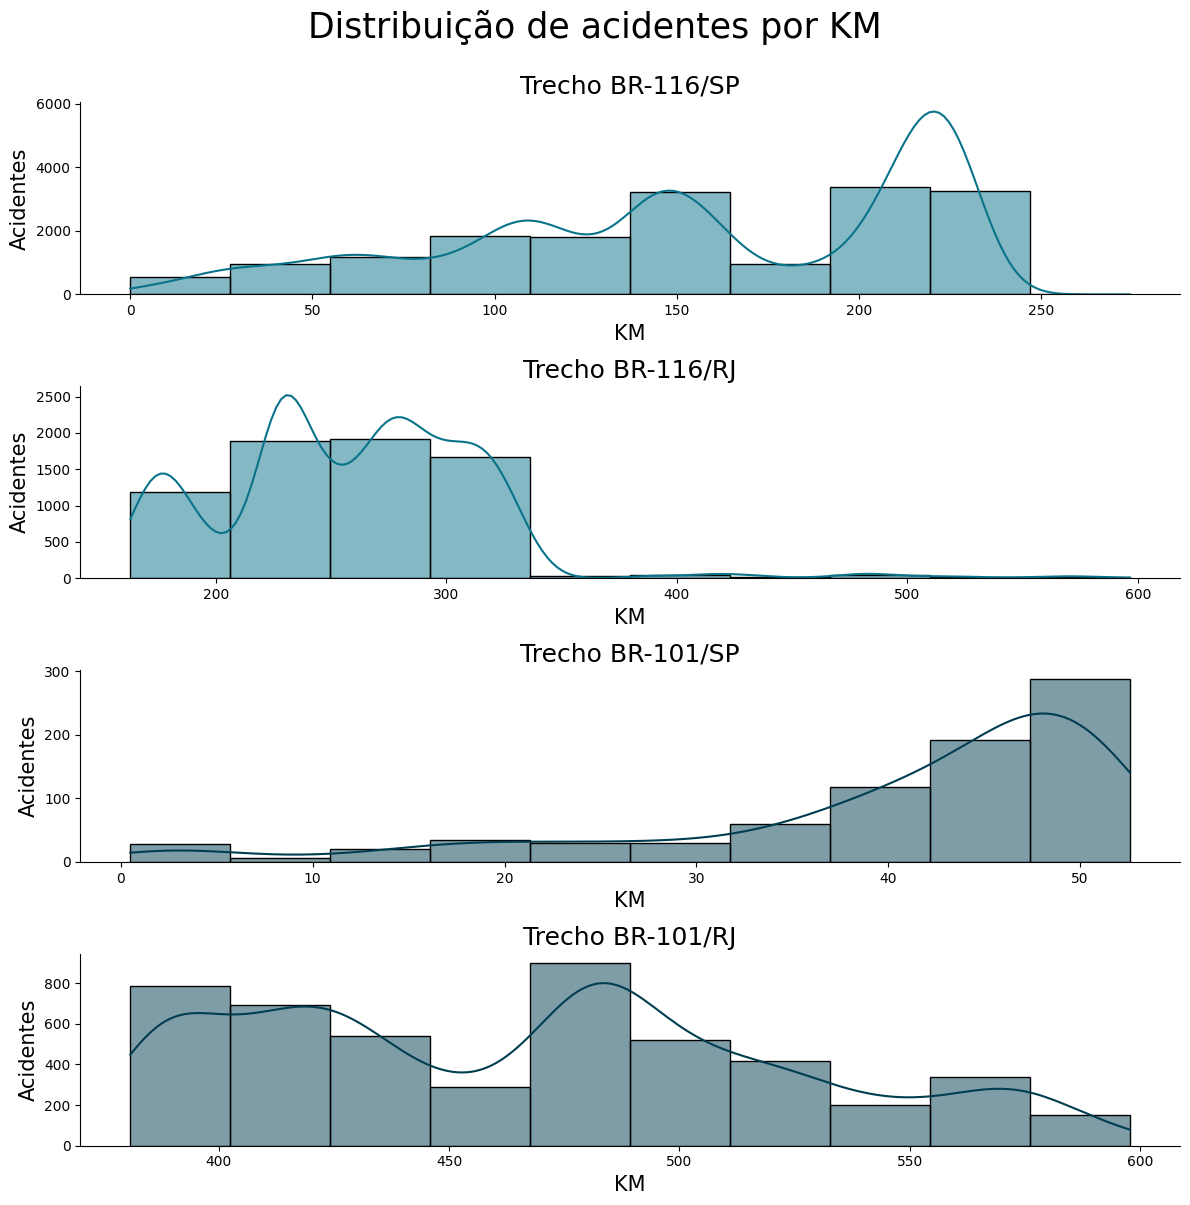

In [18]:
# Criando o histograma de cada rodovia

# Cria a figura e os gr√°ficos a serem plotados. Define o tamanho
fig, axes = plt.subplots(4, 1, figsize=(12, 12))

# Cria o histograma por KM da BR-116, em SP e RJ
ax_br116sp = sns.histplot(
    data = df[df['trecho'] == 'BR-116/SP'],
    x = 'km_ajustado',
    bins = 10,
    ax = axes[0],
    color = '#09738a',
    kde = True
)
ax_br116rj = sns.histplot(
    data = df[df['trecho'] == 'BR-116/RJ'],
    x = 'km_ajustado',
    bins = 10,
    ax = axes[1],
    color = '#09738a',
    kde = True
)
# Cria o histograma por KM da BR-101
ax_br101sp = sns.histplot(
    data = df[df['trecho'] == 'BR-101/SP'],
    x = 'km_ajustado',
    bins = 10,
    ax = axes[2],
    color = '#003d50',
    kde = True
)
ax_br101rj = sns.histplot(
    data = df[df['trecho'] == 'BR-101/RJ'],
    x = 'km_ajustado',
    bins = 10,
    ax = axes[3],
    color = '#003d50',
    kde = True
)

# Alterando o t√≠tulo
ax_br116sp.set_title(
    'Trecho BR-116/SP',
    loc = 'center',
    fontsize = 18
)
ax_br116rj.set_title(
    'Trecho BR-116/RJ',
    loc = 'center',
    fontsize = 18
)
ax_br101sp.set_title(
    'Trecho BR-101/SP',
    loc = 'center',
    fontsize = 18
)
ax_br101rj.set_title(
    'Trecho BR-101/RJ',
    loc = 'center',
    fontsize = 18
)

# Adicionando as labels dos eixos x e y
ax_br116sp.set_xlabel(
    'KM',
    fontsize = 15
)
ax_br116sp.set_ylabel(
    'Acidentes',
    fontsize = 15
)
ax_br116rj.set_xlabel(
    'KM',
    fontsize = 15
)
ax_br116rj.set_ylabel(
    'Acidentes',
    fontsize = 15
)
ax_br101sp.set_xlabel(
    'KM',
    fontsize = 15
)
ax_br101sp.set_ylabel(
    'Acidentes',
    fontsize = 15
)
ax_br101rj.set_xlabel(
    'KM',
    fontsize = 15
)
ax_br101rj.set_ylabel(
    'Acidentes',
    fontsize = 15
)

# Retira as linhas que fecham a 'caixa' do gr√°fico, mantendo apenas os eixos
sns.despine()

# Cria um t√≠tulo para a figura como um todo
plt.suptitle(
    'Distribui√ß√£o de acidentes por KM', 
    fontsize=25,
    y=1     # Adiciona espa√ßo em rela√ß√£o aos gr√°ficos
)

# Organiza os elementos dos gr√°ficos
plt.tight_layout()

# Exibe a figura
plt.show()

Podemos ver que a numera√ß√£o n√£o √© cont√≠nua na mesma rodovia, j√° que os trechos da BR-116 possuem KMs iguais. 

Com esse histograma, podemos ver que na BR-116/SP existe dois picos, um menor no KM 150, e outro maior entre os KMs 200 e 250. Enquanto no trecho BR-116/RJ, existe uma distribui√ß√£o mais igualit√°ria, com exce√ß√£o dos KMs acima de 300, que s√£o muito baixos, podemos analisar melhor a seguir.

J√° na BR-101, podemos ver que existe um pico perto do KM 50 do trecho SP, e no trecho RJ, o maior pico fica entre o KM 450 e 500.

### Gr√°fico Boxplot e Violinplot

Podemos verificar essa distribui√ß√£o de acidentes com outro tipo de gr√°fico: boxplot. Boxplot √© um tipo de gr√°fico que nos apresenta de forma gr√°fica alguns indicadores de distribui√ß√£o, como: 1¬∫ quartil, mediana, 2¬∫ quartil, intervalo interquartil, limite inferior e superior, e outliers.

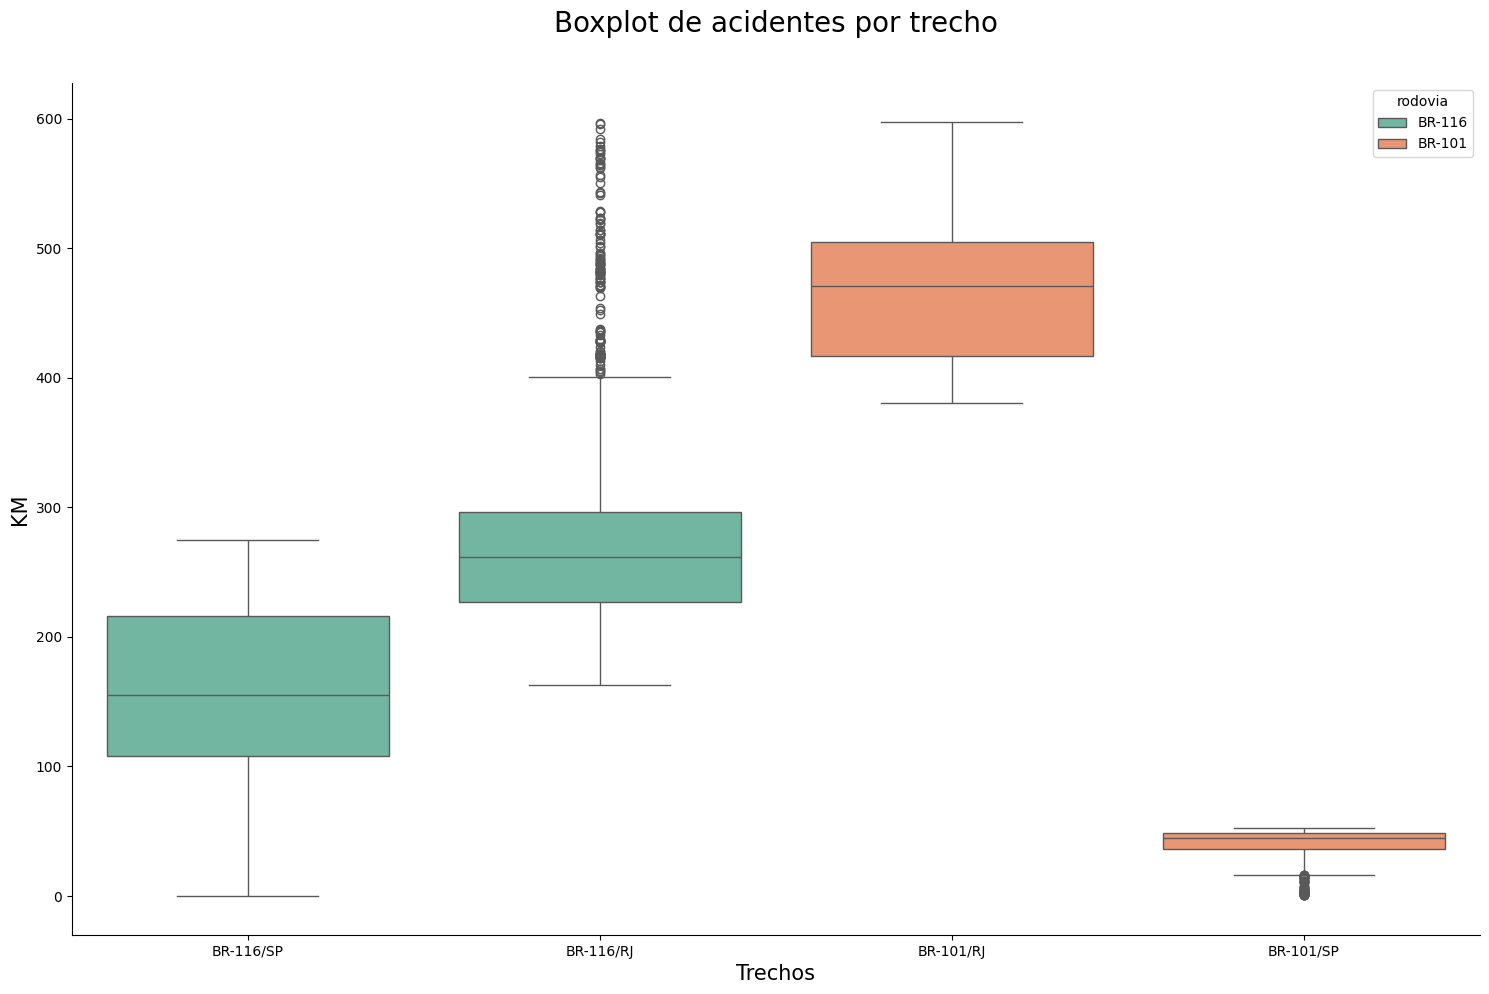

In [19]:
# Criando o gr√°fico boxplot

# Plotamos o gr√°fico boxplot com o sns.boxplot
ax_boxplot = sns.boxplot(
    data = df,
    y = 'km_ajustado',
    x = 'trecho',
    hue = 'rodovia',
    palette = 'Set2',   # Podemos usar uma paleta de cores padronizada
    showfliers = True   # Se for False, n√£o exibe os outliers
)

# Alterando o tamanho do gr√°fico
ax_boxplot.figure.set_size_inches(15,10)

# Alterando o t√≠tulo
ax_boxplot.set_title(
    'Boxplot de acidentes por trecho',
    loc = 'center',
    fontsize = 20,
    y = 1.05
)

# Adicionando as labels dos eixos x e y
ax_boxplot.set_xlabel(
    'Trechos',
    fontsize = 15
)
ax_boxplot.set_ylabel(
    'KM',
    fontsize = 15
)

# Retira as linhas que fecham a 'caixa' do gr√°fico, mantendo apenas os eixos
sns.despine()

# Organiza os elementos dos gr√°ficos
plt.tight_layout()

# Exibe a figura
plt.show()

Com o boxplot podemos entender como nossos dados est√£o distribu√≠dos, e verificar que existem outliers no nossos dados.

Por exemplo, no trecho BR-116/RJ, existem v√°rios outliers que est√£o acima do KM 400. Fazendo uma r√°pida pesquisa no site da CCR RioSP, pude checar que o trecho BR-116/RJ termina no KM 400, que √© quando inicia o trecho BR-116/SP. Ent√£o seriam esses outliers uma entrada de dados incorreta? Seria necess√°rio checar com os respons√°veis da inser√ß√£o de dados para entender o que houve de fato.

Para uma an√°lise estat√≠stica mais avan√ßada, esses outliers ter√£o que ser exclu√≠dos.

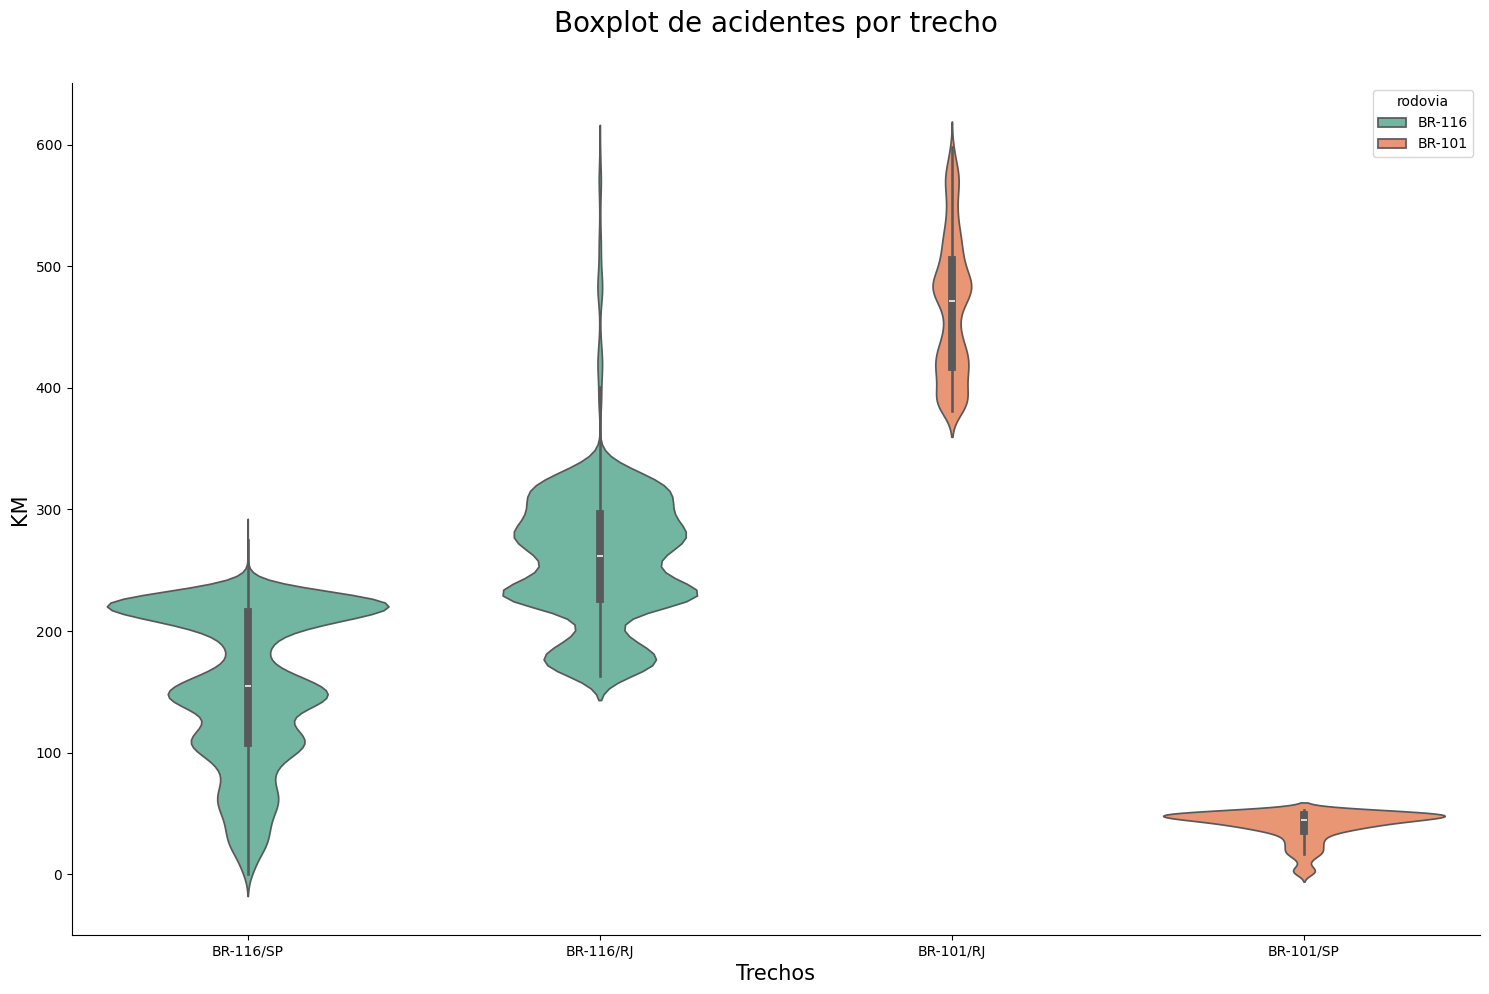

In [20]:
# Criando o gr√°fico boxplot

# Plotamos o gr√°fico boxplot com o sns.boxplot
ax_violinplot = sns.violinplot(
    data = df,
    y = 'km_ajustado',
    x = 'trecho',
    hue = 'rodovia',
    palette = 'Set2',   # Podemos usar uma paleta de cores padronizada
    inner = 'box'       # Define como o interior do violino ser√°             
)

# Alterando o tamanho do gr√°fico
ax_violinplot.figure.set_size_inches(15,10)

# Alterando o t√≠tulo
ax_violinplot.set_title(
    'Boxplot de acidentes por trecho',
    loc = 'center',
    fontsize = 20,
    y = 1.05
)

# Adicionando as labels dos eixos x e y
ax_violinplot.set_xlabel(
    'Trechos',
    fontsize = 15
)
ax_violinplot.set_ylabel(
    'KM',
    fontsize = 15
)

# Retira as linhas que fecham a 'caixa' do gr√°fico, mantendo apenas os eixos
sns.despine()

# Organiza os elementos dos gr√°ficos
plt.tight_layout()

# Exibe a figura
plt.show()

O gr√°fico violinplot √© muito parecido com o boxplot, com a diferen√ßa que ele nos retorna, ao inv√©s de uma caixa (que ainda est√° no gr√°fico, como uma linha, mas menor em compara√ß√£o ao boxplot), a distribui√ß√£o dos nossos dados, igual ao kde do histograma. Praticamente uma fus√£o do boxplot com o gr√°fico de kde.

### Gr√°fico de Pizza

Gr√°ficos de pizza s√£o vilanizados por muitos na √°rea de dados, mas eles tem sua import√¢ncia e podem sim ser usados.

O seaborn n√£o possui a fun√ß√£o de gr√°fico de pizza. Vamos faz√™-lo de dois modos: com matplotlib e com o pr√≥prio pandas.

In [ ]:
# Cria um dataframe com os mortos e gravemente feridos dos acidentes por trecho

df_morteTrecho = df.groupby(
    'trecho',
    as_index=False
)[['mortos', 'gravemente_feridos']].sum()

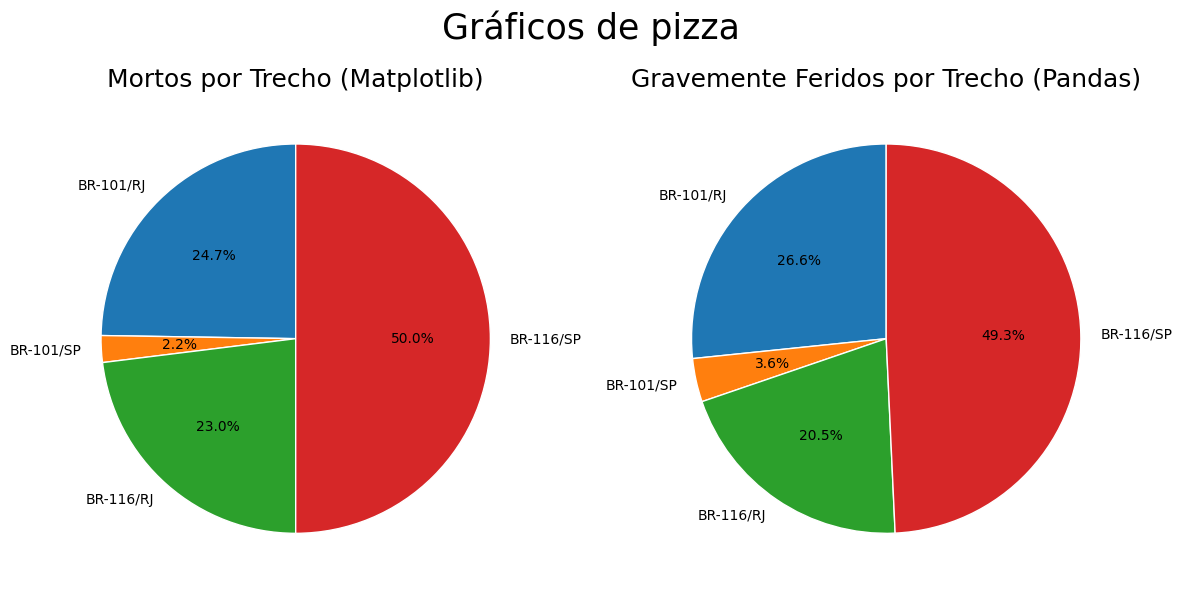

In [ ]:
# Crio o gr√°fico de pizza

# Crio a figura e o Ax dos gr√°ficos
fig_pizza, ax_pizza = plt.subplots(1,2,figsize=(12,6))

# Crio o gr√°fico com matplotlib
ax_pizza[0].pie(
    x = df_morteTrecho['mortos'],
    labels = df_morteTrecho['trecho'],
    autopct = '%1.1f%%',   # mostra os percentuais
    wedgeprops={'edgecolor': 'white'},  # Adiciona bordas brancas ao peda√ßos da pizza
    startangle = 90,       # come√ßa do topo (90 graus)
)

# Crio o gr√°fico com pandas
df_morteTrecho.set_index('trecho')['gravemente_feridos'].plot(
    kind='pie',
    autopct='%1.1f%%',   # mostra percentuais
    startangle=90,       # come√ßa do topo
    ylabel='',           # remove o label do eixo Y
    wedgeprops={'edgecolor': 'white'},  # Adiciona bordas brancas ao peda√ßos da pizza
    ax = ax_pizza[1]
)

# Alterando o t√≠tulo
ax_pizza[0].set_title(
    'Mortos por Trecho (Matplotlib)',
    fontsize = 18
)
ax_pizza[1].set_title(
    'Gravemente Feridos por Trecho (Pandas)',
    fontsize = 18
)

# Cria um t√≠tulo para a figura como um todo
plt.suptitle(
    'Gr√°ficos de pizza', 
    fontsize=25,
    y=1     # Adiciona espa√ßo em rela√ß√£o aos gr√°ficos
)

# Organiza os elementos dos gr√°ficos
plt.tight_layout()

# Exibindo a figura
plt.show()

Gr√°ficos de pizza com poucas categorias nos fornecem boas informa√ß√µes dos nossos dados. Por exemplo, temos que 50% dos mortos em acidentes acontecem no trecho da BR-116/SP, e praticamente a mesma porcentagem no caso de feridos graves. L√≥gico que para se ter alguma informa√ß√£o mais acertiva, precisariamos de mais dados, pois, a BR-116/SP pode ter mais mortos simplesmente por ser o maior trecho de rodovia da concession√°ria RioSP, ou ser a mais movimentada. Mesmo assim o gr√°fico de pizza nos trouxe uma boa informa√ß√£o que pode ser o ponto de partida para uma an√°lise mais refinada.